# Negative Initial Time example
In this Example we use a simple `HISRD` model with an infection event occuring at `t=0` to show the proper method to simulate a model with an initial time < 0.  

## Setup the Environment

In [1]:
import os
import sys
sys.path.insert(1, os.path.abspath(os.path.join(os.getcwd(), '../..')))

In [2]:
import numpy as np

In [3]:
from gillespy2 import (
    Model,
    Species,
    Parameter,
    Reaction,
    Event,
    EventTrigger,
    EventAssignment,
    TimeSpan
)

## Build the Model

In [4]:
def build_hisrd(end_time=100, parameter_values=None):
    # Initialize model                                                                                                                                                                                                      
    model = Model(name="HISRD")

    # Define Species                                                                                                                                                                                             
    healthy = Species(name='healthy', initial_value=10000)
    infected = Species(name='infected', initial_value=0)
    symptomatic = Species(name='symptomatic', initial_value=0)
    dead = Species(name='dead', initial_value=0)
    recovered = Species(name='recovered', initial_value=0)
    
    # Add Species to Model
    model.add_species([healthy, infected, symptomatic, dead, recovered])

    # Define Parameters                                                                                                                                                                                                                 
    infect = Parameter(name='infect', expression=np.exp(np.log(0.0001)))
    progress = Parameter(name='progress', expression=np.exp(np.log(0.071)))
    recovery = Parameter(name='recovery', expression=np.exp(np.log(0.8)))
    death = Parameter(name='death', expression=np.exp(np.log(0.2)))
    infect_start = Parameter('infect_start', expression=0)
    
    # Add Parameters to Model
    model.add_parameter([infect, progress, recovery, death, infect_start])

    # Define Reactions
    r2 = Reaction(name='r2', reactants={healthy: 1, infected: 1 }, products={infected: 2}, rate=infect)
    r3 = Reaction(
        name='r3', reactants={healthy: 1, symptomatic: 1}, products={infected: 1, symptomatic: 1}, rate=infect
    )
    r4 = Reaction(name='r4', reactants={infected: 1}, products={symptomatic: 1}, rate=progress)
    r5 = Reaction(name='r5', reactants={symptomatic: 1}, products={dead: 1}, rate=death)
    r6 = Reaction(name='r6', reactants={symptomatic: 1}, products={recovered: 1}, rate=recovery)
    
    # Add Reactions to Model
    model.add_reaction([r2, r3, r4, r5, r6])
    
    # Define Event Triggers
    trigger = EventTrigger(expression=f"t > infect_start")
    
    # Define Event Assignments
    infection_intro = EventAssignment(variable="infected", expression="1")
    
    # Define Events
    e1 = Event(name="Infection_Introduction", trigger=trigger, assignments=[infection_intro])
    
    # Add Events to Model
    model.add_event(e1)

    # Define Timespan
    tspan = TimeSpan.arange(t=end_time, increment=1)
    
    # Add Timespan to Model
    model.timespan(tspan)
    return model

### Instantiate the Model
Here, we build a model that will simulate the disease progression without data prior to the infection.  We use an event to introduce the infection.

In [5]:
model = build_hisrd()

In [6]:
p_model = build_hisrd(end_time=150)

## Run the Simulations
#### Simulate from Infection Introduction

In [7]:
results = model.run()

#### Simulate Infection with past population data
To model population data from prior to the infection we need to modify the infect event trigger by the ent time of the add period.  We do this using the variable solver to modify the infect_start parameter.

In [8]:
p_results = p_model.run(variables={'infect_start': 50})

## Processing Results
To visualize the results with the infection event at `t=0` we must swift the time sub array in the results by the added simulation time.

In [9]:
p_results[0]['time'] = p_results[0]['time'] - 50

## Visualization

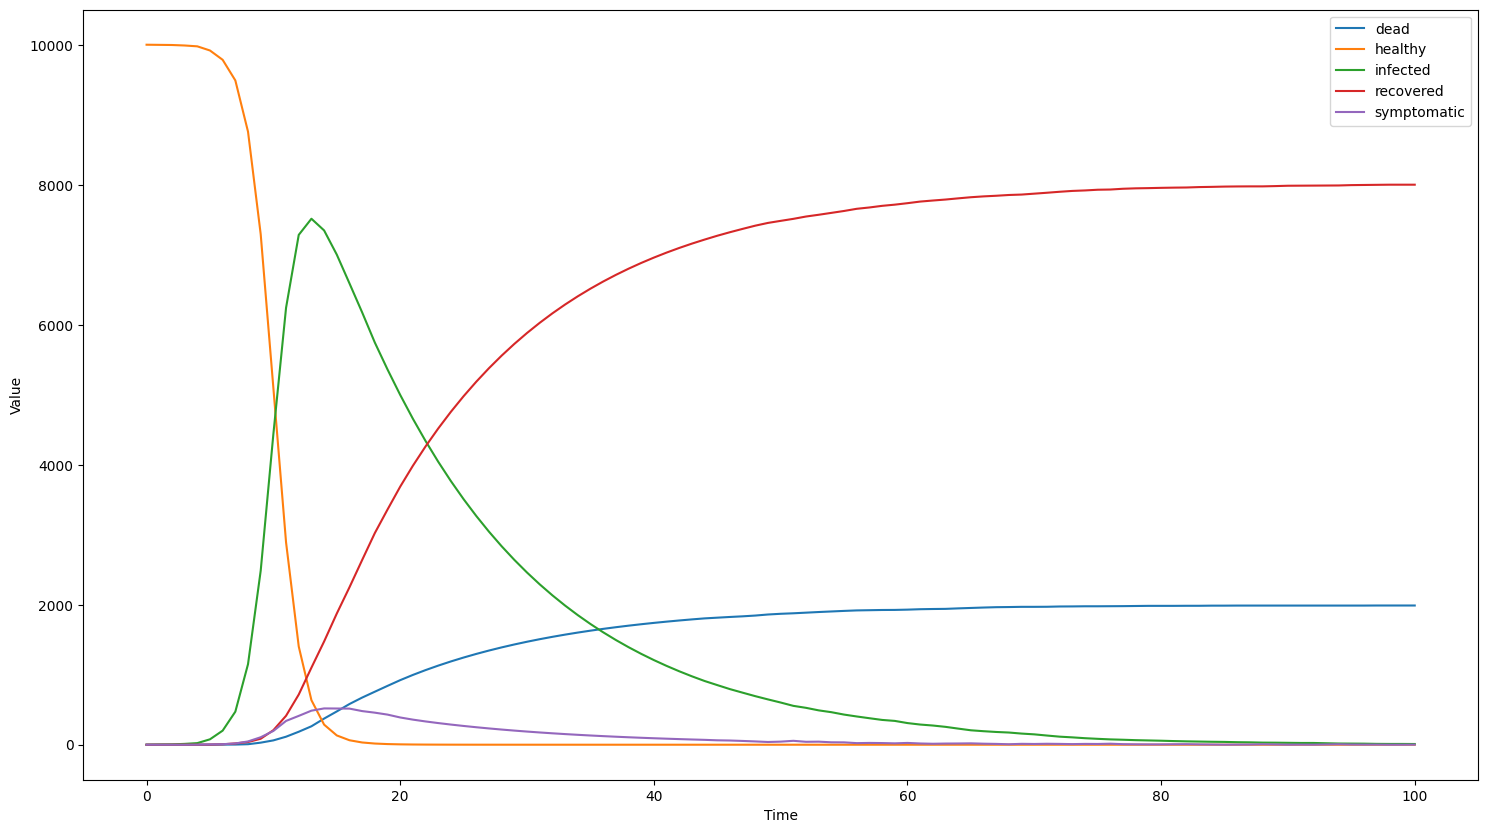

In [10]:
results.plot()

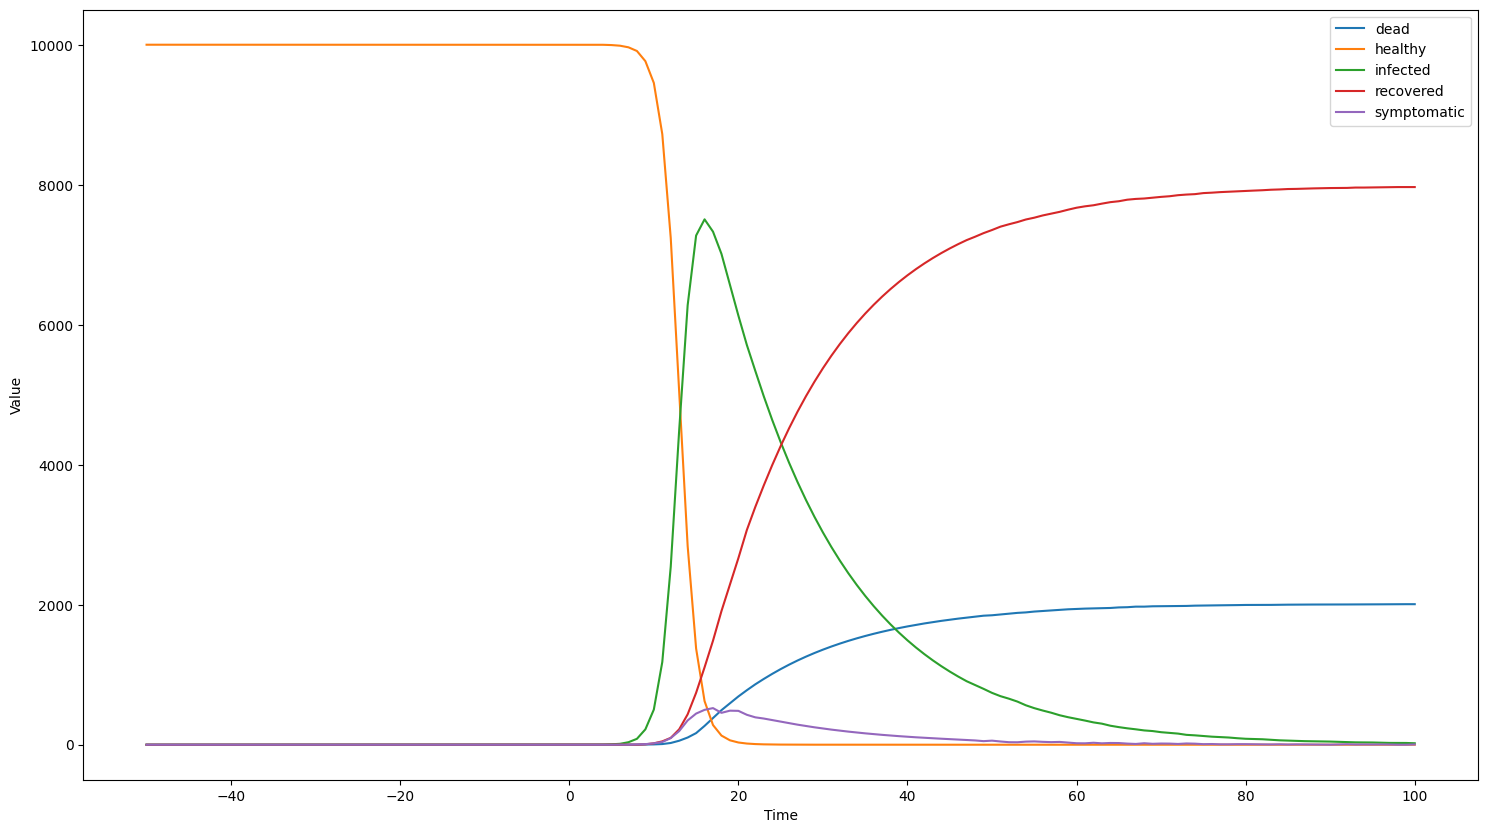

In [11]:
p_results.plot()